- Three (3) data sets are included in the data packet (IMS-Rexnord Bearing Data.zip). 
- Each data set describes a test-to-failure experiment. 
- Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals.
- Each file consists of 20,480 points with the sampling rate set at 20 kHz. 
- The file name indicates when the data was collected. Each record (row) in the data file is a data point.

In [3]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [76]:
path=r'IMS\2nd_test'

In [77]:
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [78]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


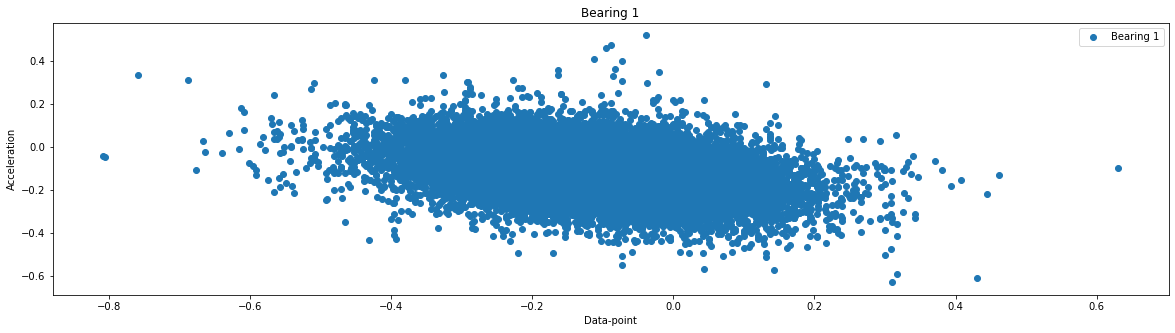

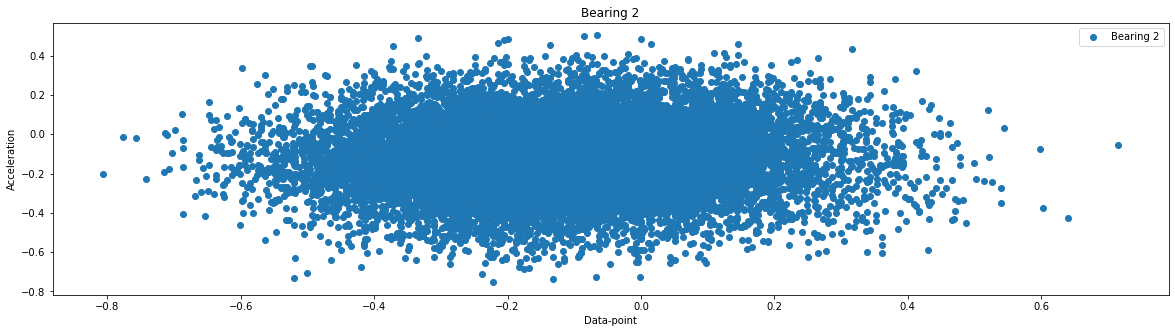

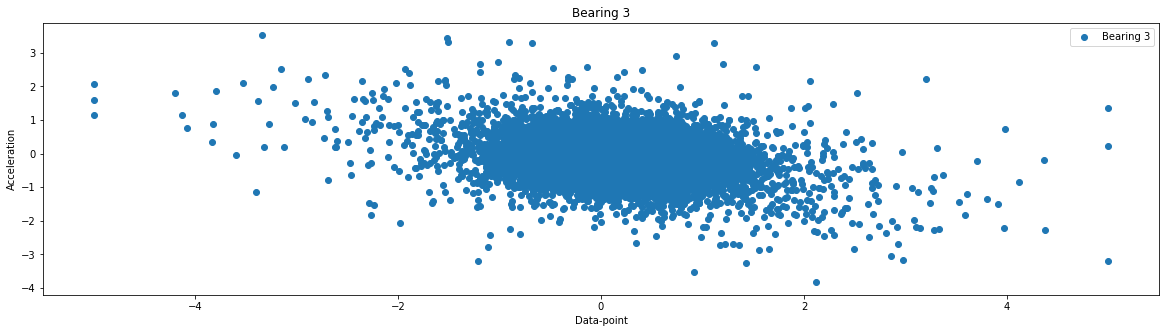

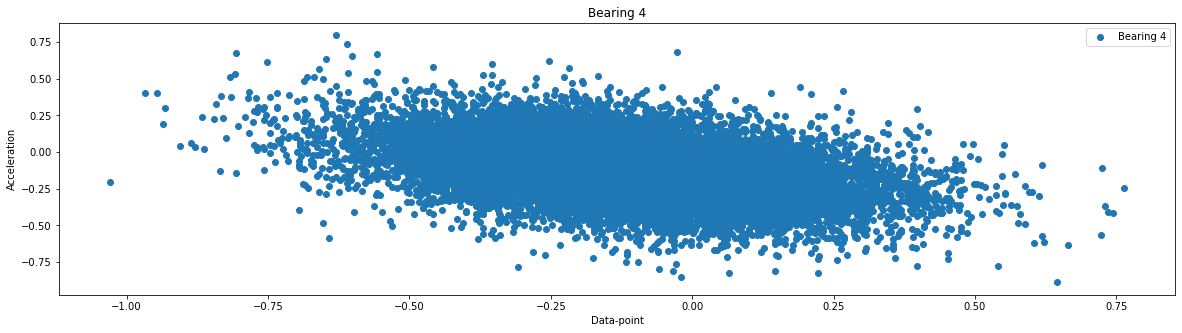

In [41]:
  #This is for 1st_test as each bearing has 2 channels
  count=0
  for i in range(0,8,2):  
    count+=1    
    df_xbearing=np.array(dataset.iloc[:,i])
    df_ybearing=np.array(dataset.iloc[:,i+1])
    
    
    
    plt.figure(figsize=(20, 5))
    plt.scatter(df_xbearing,df_ybearing)

    plt.legend(['Bearing {}'.format(count)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(count))
    plt.show()

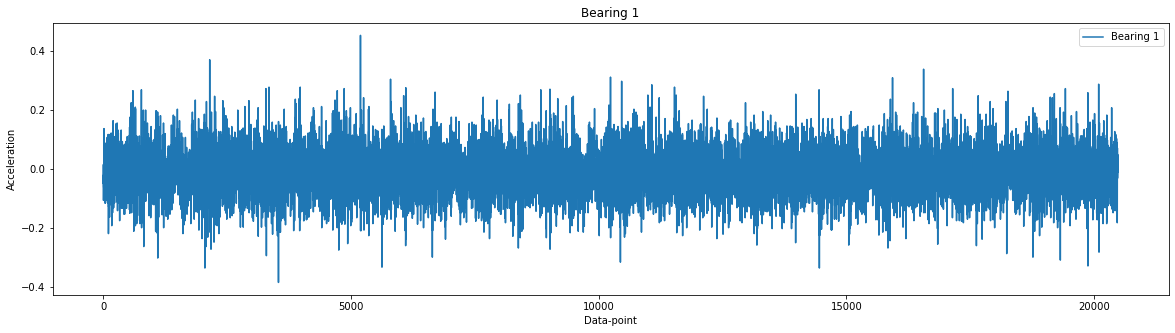

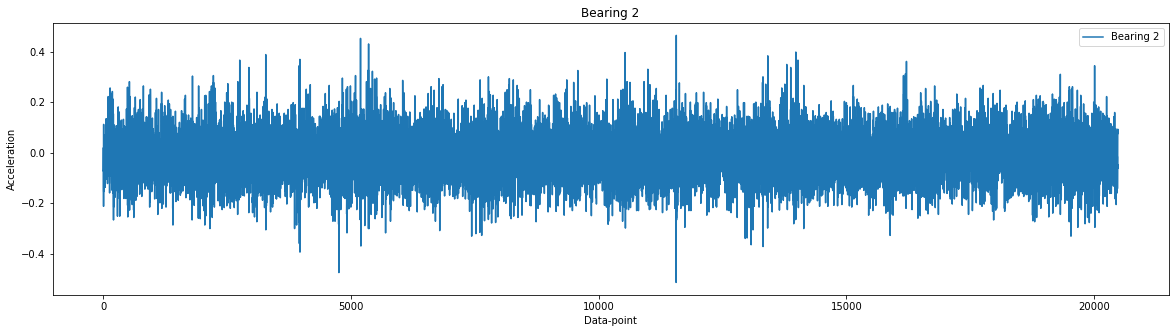

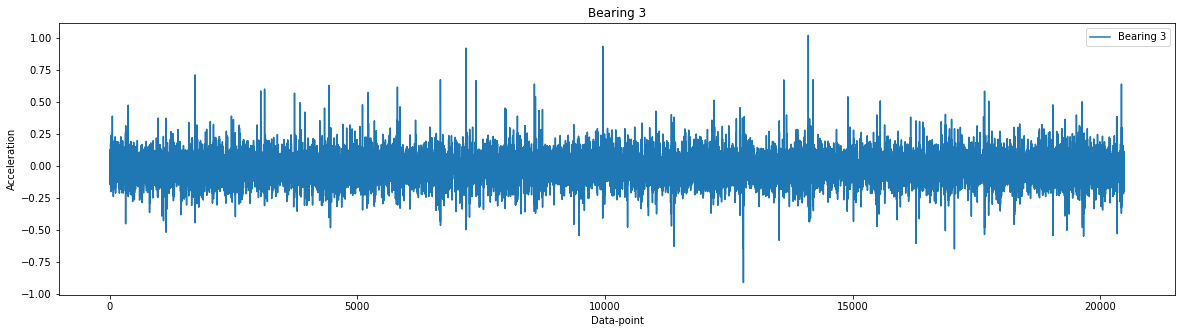

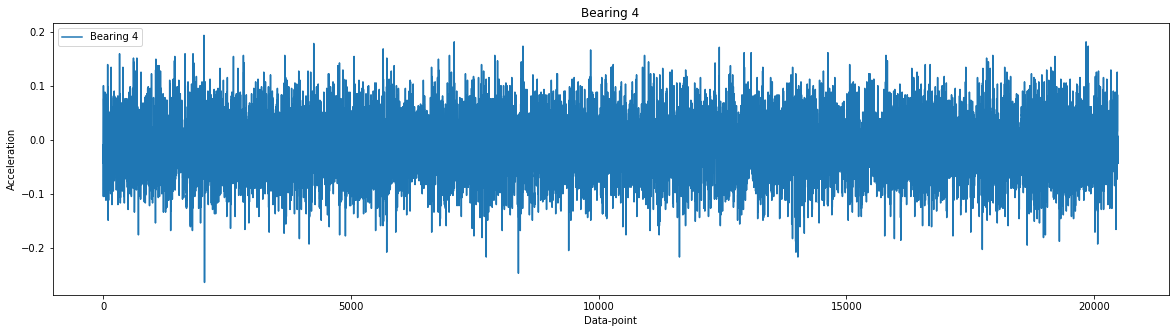

In [79]:
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [65]:
#This is for 1st_test
bearing_no=1

bearing_xdata = np.array(dataset.iloc[:,bearing_no-1])
bearing_ydata = np.array(dataset.iloc[:,bearing_no])
bearing_data =  np.column_stack((bearing_xdata,bearing_ydata))



bearing_data

array([[-0.071, -0.117],
       [-0.066, -0.068],
       [-0.078, -0.154],
       ...,
       [-0.081, -0.02 ],
       [-0.115, -0.146],
       [-0.098, -0.166]])

In [80]:
#this is for other tests
bearing_no=1
bearing_data = np.array(dataset.iloc[:,bearing_no-1])
bearing_data

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [81]:
temp = bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [82]:
# extracting features from this bearing data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

We will calculate following time domain features.

* Maximum value
* Minimum value
* Mean value 
* Standard deviation (Unbiased std)
* Root mean square value (RMS)
* Skewness
* Kurtosis
* Crest factor = $\frac{\text{Max}}{\text{RMS}}$
* Form factor = $\frac{\text{RMS}}{\text{Mean}}$

In [29]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [30]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [85]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [86]:
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [87]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


In [40]:
Time_feature_matrix=pd.DataFrame()

test_set=3     #test_set_1 has 8 channels[bearing1=(0,1) ,bearing2=(2,3),bearing3=(4,5),bearing4=(6,7)]

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set
#use this for the test_set_1 
#channel_x_number=6
#channel_y_number=7

path=r'IMS\3rd_test\4th_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
    #This is for the other tests
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
    
    #this is for test_set_1
    #bearing_xdata = np.array(dataset.iloc[:,channel_x_number])
    #bearing_ydata = np.array(dataset.iloc[:,channel_y_number])
    #bearing_data =  np.column_stack((bearing_xdata,bearing_ydata))

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)
    

In [41]:
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004.03.04.09.32,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004.03.04.09.42,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004.03.04.09.52,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004.03.04.10.02,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004.04.18.02.02,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004.04.18.02.12,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004.04.18.02.22,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004.04.18.02.32,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


In [42]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


# Test-1 Bearing Dataset Visualization

- Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
- No. of Files: 2156
- No. of Channels: 8
- Channel Arrangement: Bearing 1 – Ch 1&2; Bearing2 – Ch 3&4; Bearing3 – Ch5&6; Bearing 4 – Ch 7&8.
- File Recording Interval: Every 10 minutes(except the first 43 files were taken every 5 minutes)
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect                in bearing 4.

In [4]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.701,-0.720,-0.094236,0.076067,0.121106,0.136104,6.781065,5.788326,-1.285127
2003-10-22 12:09:00,0.581,-0.654,-0.094397,0.074692,0.120372,0.012072,6.105981,4.826686,-1.275174
2003-10-22 12:14:00,0.549,-0.623,-0.096025,0.075034,0.121864,0.067107,5.858302,4.505033,-1.269086
2003-10-22 12:19:00,0.535,-0.598,-0.095460,0.076196,0.122140,0.086053,5.739395,4.380210,-1.279496
2003-10-22 12:24:00,0.388,-0.623,-0.095314,0.077253,0.122689,0.007836,5.406455,3.162464,-1.287210
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.491,-0.669,-0.117679,0.111065,0.161813,0.049334,4.166748,3.034358,-1.375039
2003-11-25 23:13:00,0.657,-0.803,-0.116975,0.118583,0.166567,-0.034480,4.563287,3.944348,-1.423959
2003-11-25 23:19:00,0.564,-0.710,-0.117724,0.117260,0.166158,-0.084696,4.127988,3.394356,-1.411420
2003-11-25 23:29:00,0.637,-0.776,-0.118584,0.116973,0.166567,0.016083,4.264643,3.824292,-1.404629


In [8]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv",index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_1.csv",index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_1.csv",index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_1.csv",index_col='Unnamed: 0')

In [9]:
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.701,-0.720,-0.094236,0.076067,0.121106,0.136104,6.781065,5.788326,-1.285127
2003-10-22 12:09:00,0.581,-0.654,-0.094397,0.074692,0.120372,0.012072,6.105981,4.826686,-1.275174
2003-10-22 12:14:00,0.549,-0.623,-0.096025,0.075034,0.121864,0.067107,5.858302,4.505033,-1.269086
2003-10-22 12:19:00,0.535,-0.598,-0.095460,0.076196,0.122140,0.086053,5.739395,4.380210,-1.279496
2003-10-22 12:24:00,0.388,-0.623,-0.095314,0.077253,0.122689,0.007836,5.406455,3.162464,-1.287210
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.491,-0.669,-0.117679,0.111065,0.161813,0.049334,4.166748,3.034358,-1.375039
2003-11-25 23:13:00,0.657,-0.803,-0.116975,0.118583,0.166567,-0.034480,4.563287,3.944348,-1.423959
2003-11-25 23:19:00,0.564,-0.710,-0.117724,0.117260,0.166158,-0.084696,4.127988,3.394356,-1.411420
2003-11-25 23:29:00,0.637,-0.776,-0.118584,0.116973,0.166567,0.016083,4.264643,3.824292,-1.404629


# Visualizing The Bearing Data

In [10]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

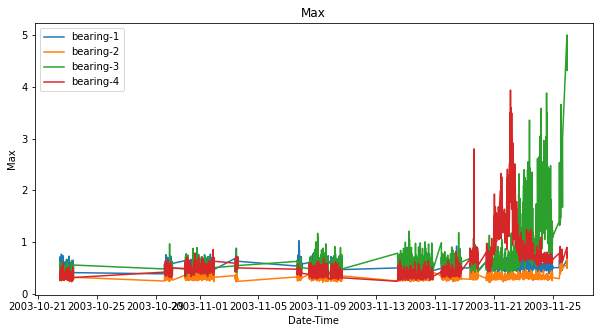

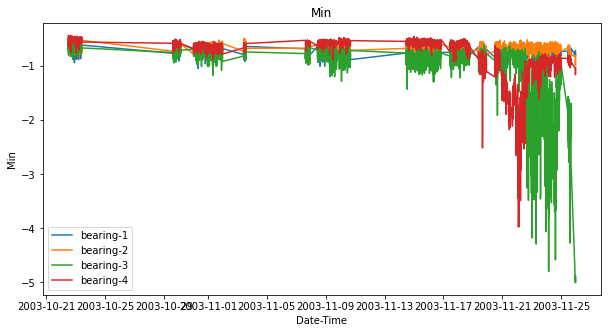

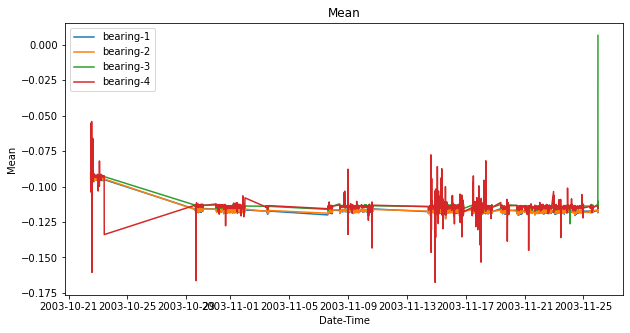

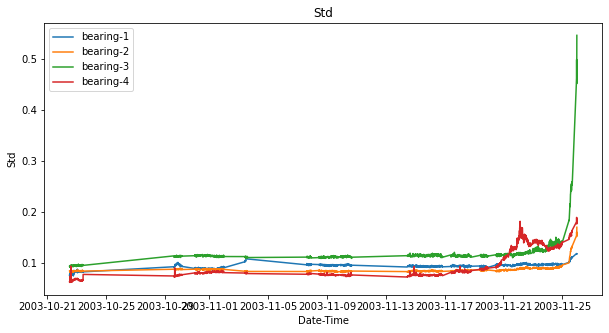

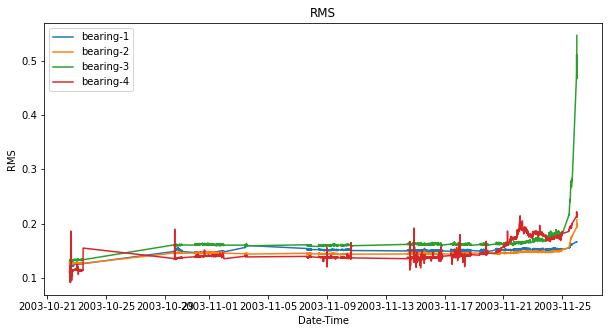

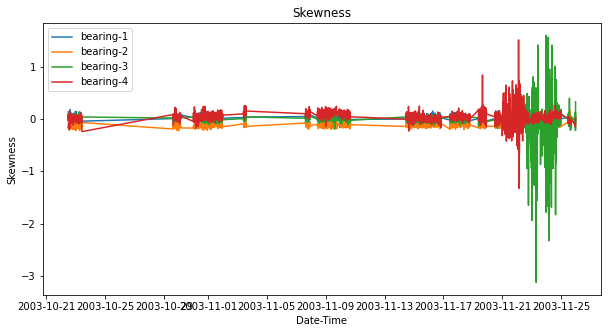

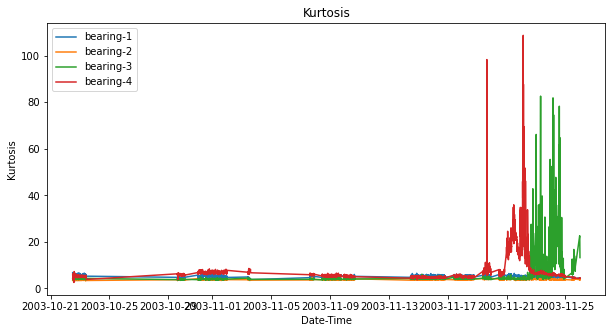

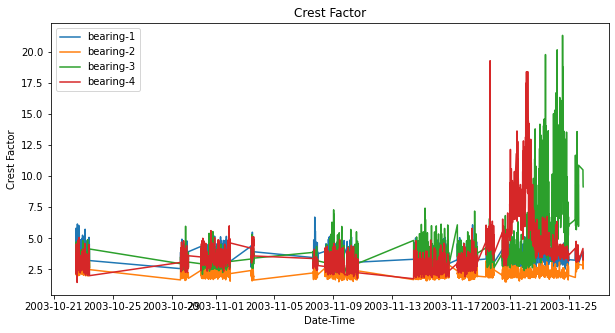

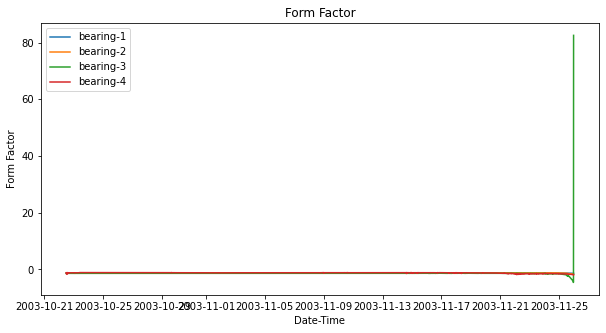

In [11]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Saving the Inner Race Fault
From the above visiualization we can see  for bearing three  from 23-11-21 it started to deviate from other bearings hence we save the fault

In [18]:
df_IRF=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']

In [19]:
fault=[]
for i in range (0,len(df_IRF)):
    fault.append('Inner Race')
   
df_IRF.insert(9, 'Fault', fault)
df_IRF

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.427,-0.957,-0.114544,0.114860,0.162212,0.012648,4.174285,2.632356,-1.416159,Inner Race
2003-11-21 00:44:00,0.630,-0.854,-0.114133,0.114467,0.161644,-0.023019,4.360105,3.897460,-1.416272,Inner Race
2003-11-21 00:54:00,0.645,-0.718,-0.113959,0.114801,0.161758,0.073040,3.947496,3.987435,-1.419438,Inner Race
2003-11-21 01:04:00,0.815,-0.750,-0.114464,0.112841,0.160732,0.020532,4.516740,5.070541,-1.404215,Inner Race
2003-11-21 01:14:00,0.723,-0.728,-0.115217,0.116000,0.163495,-0.045946,4.338510,4.422146,-1.419020,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.786,-1.250,-0.115377,0.138017,0.179889,-0.116339,5.248243,4.369366,-1.559138,Inner Race
2003-11-24 17:47:00,2.422,-2.920,-0.114484,0.147451,0.186676,-0.351744,30.478306,12.974347,-1.630583,Inner Race
2003-11-24 17:57:00,1.465,-1.660,-0.113358,0.144960,0.184019,0.094072,9.968951,7.961141,-1.623345,Inner Race
2003-11-24 18:07:00,1.123,-2.158,-0.114316,0.138724,0.179755,0.017244,8.632450,6.247389,-1.572446,Inner Race


In [20]:
df_IRF.to_csv('inner_race_fault.csv',index=False)

# Saving Roller Element Defect

In [21]:
df_REF=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']

In [22]:
fault=[]
for i in range (0,len(df_REF)):
    fault.append('Roller Element')
   
df_REF.insert(9, 'Fault', fault)
df_REF

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,1.282,-1.396,-0.114328,0.106072,0.155955,0.113013,15.298812,8.220328,-1.364103,Roller Element
2003-11-21 00:44:00,1.152,-1.243,-0.113893,0.109641,0.158090,0.107068,16.482008,7.286992,-1.388057,Roller Element
2003-11-21 00:54:00,1.926,-1.270,-0.113591,0.110723,0.158626,0.327427,21.677012,12.141750,-1.396466,Roller Element
2003-11-21 01:04:00,0.945,-1.147,-0.114470,0.105724,0.155822,-0.216316,13.252367,6.064602,-1.361251,Roller Element
2003-11-21 01:14:00,1.096,-1.228,-0.117035,0.109081,0.159986,0.057868,14.443085,6.850593,-1.366994,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.701,-0.879,-0.114270,0.134435,0.176437,0.128028,5.571185,3.973088,-1.544034,Roller Element
2003-11-24 17:47:00,0.618,-0.898,-0.114284,0.131464,0.174193,0.060432,5.665486,3.547783,-1.524215,Roller Element
2003-11-24 17:57:00,0.669,-0.933,-0.113584,0.131129,0.173482,0.061219,5.727126,3.856318,-1.527338,Roller Element
2003-11-24 18:07:00,0.752,-0.872,-0.114359,0.132172,0.174777,0.098738,5.294448,4.302622,-1.528320,Roller Element


In [24]:
df_REF.to_csv('roller_element_fault.csv',index=False)

# Test-2 Bearing Dataset Visualization

- Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
- No. of Files: 984
- No. of Channels: 4
- Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch 3; Bearing 4 – Ch 4.
- File Recording Interval: Every 10 minutes
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

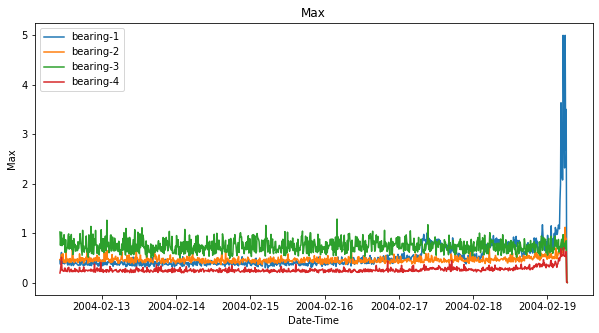

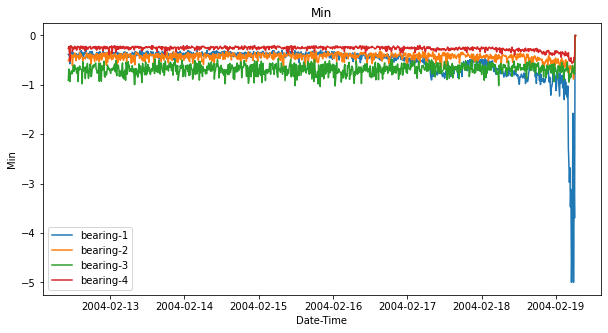

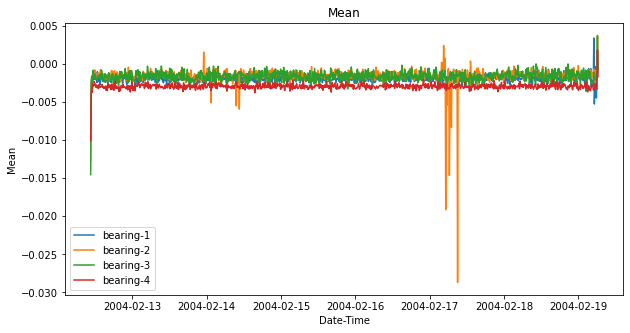

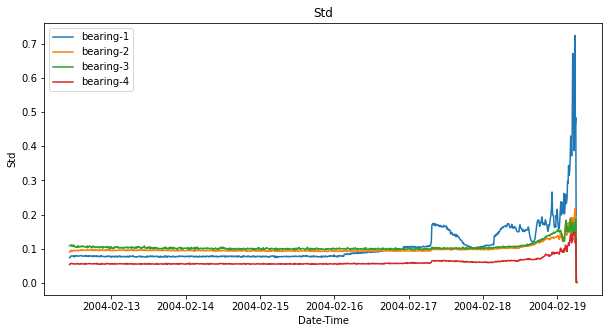

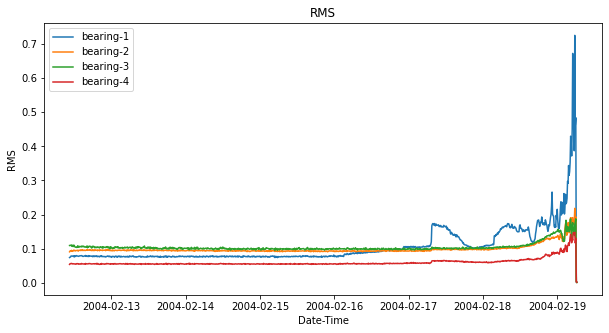

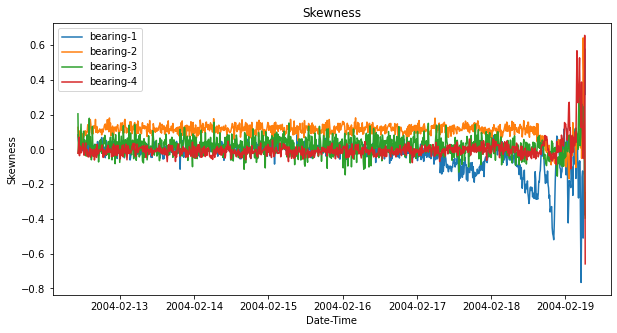

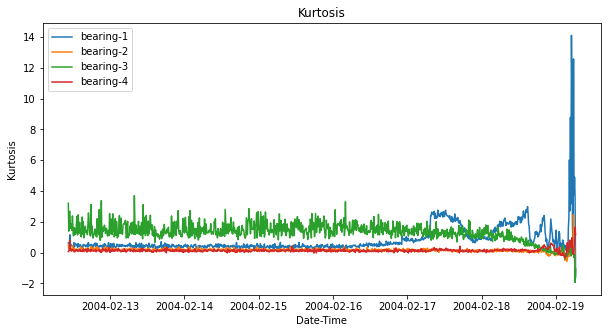

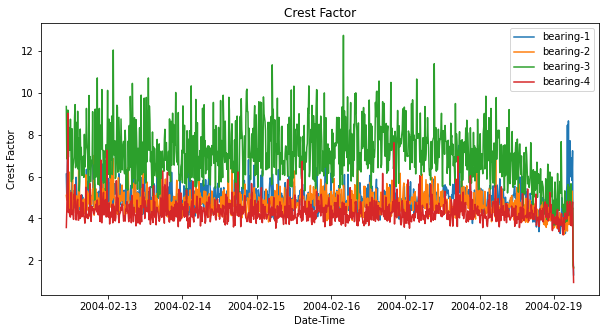

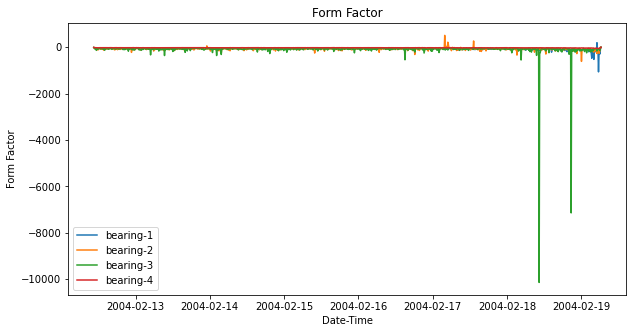

In [25]:
test_no=2

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Saving Outer Race Fault

In [26]:
df_ORF=df1['2004-02-17 12:02:00':'2004-02-19 0:42:00']
fault=[]
for i in range (0,len(df_ORF)):
    fault.append('Outer Race')

df_ORF.insert(9, 'Fault', fault)
df_ORF

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-17 12:02:00,0.813,-0.869,-0.001921,0.165243,0.165250,-0.078336,2.348220,4.919827,-86.020750,Outer Race
2004-02-17 12:12:00,0.864,-0.840,-0.002078,0.166297,0.166306,-0.050668,2.554794,5.195247,-80.036277,Outer Race
2004-02-17 12:22:00,0.876,-0.737,-0.002244,0.157539,0.157551,-0.101268,2.756310,5.560098,-70.211682,Outer Race
2004-02-17 12:32:00,0.789,-0.781,-0.001874,0.162117,0.162124,-0.076375,2.539286,4.866637,-86.515839,Outer Race
2004-02-17 12:42:00,0.803,-0.723,-0.001712,0.155821,0.155826,-0.087399,2.463552,5.153178,-91.001170,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 00:02:00,0.955,-1.118,-0.001586,0.215437,0.215437,-0.080072,1.458276,4.432845,-135.796235,Outer Race
2004-02-19 00:12:00,0.710,-1.021,-0.001834,0.183846,0.183851,-0.146662,0.885198,3.861822,-100.230775,Outer Race
2004-02-19 00:22:00,0.693,-0.728,-0.001688,0.163871,0.163876,0.120602,0.264161,4.228812,-97.072275,Outer Race
2004-02-19 00:32:00,0.647,-0.696,-0.002102,0.158311,0.158321,0.053990,0.326583,4.086625,-75.329810,Outer Race


In [27]:
df_ORF.to_csv('outer_race_fault.csv',index=False)

# Test 3

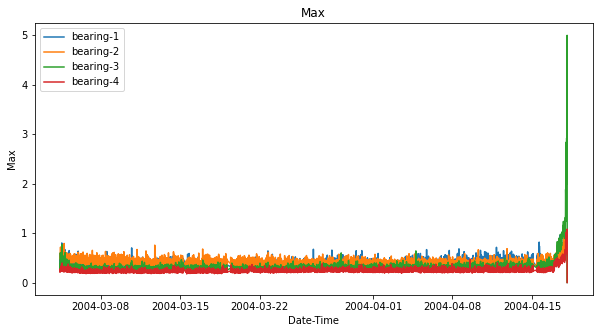

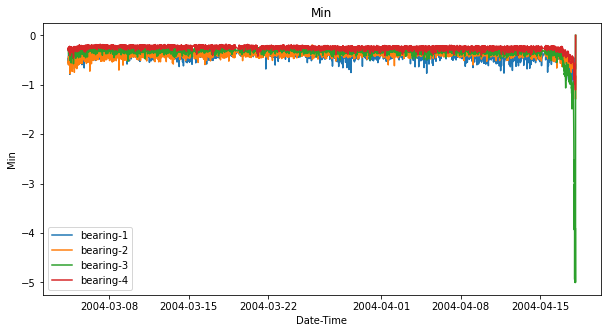

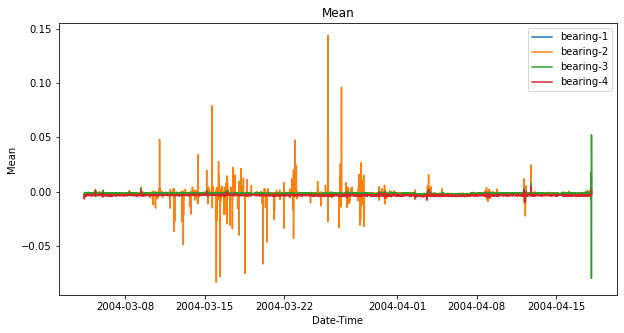

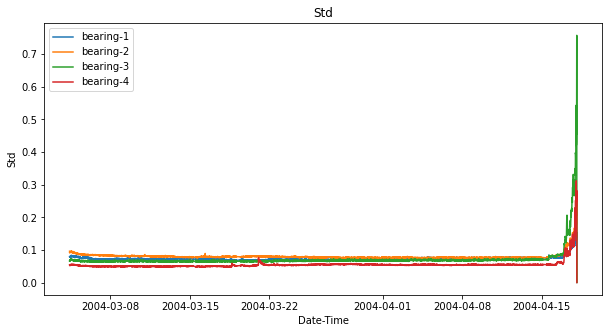

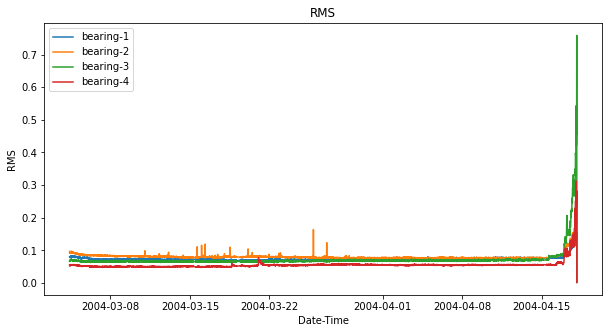

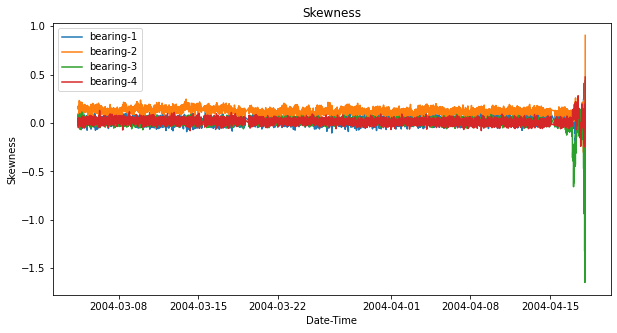

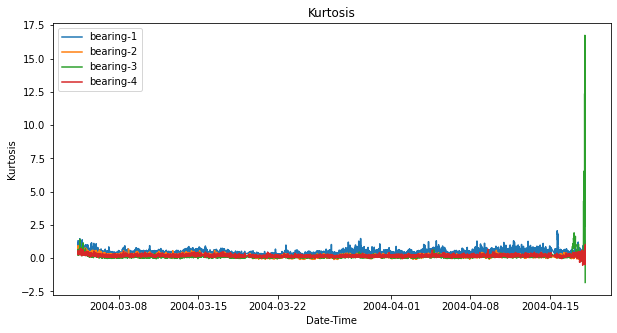

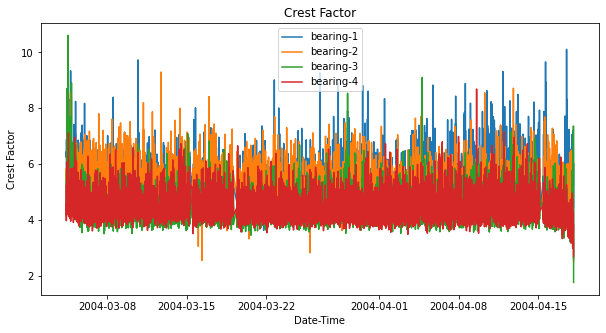

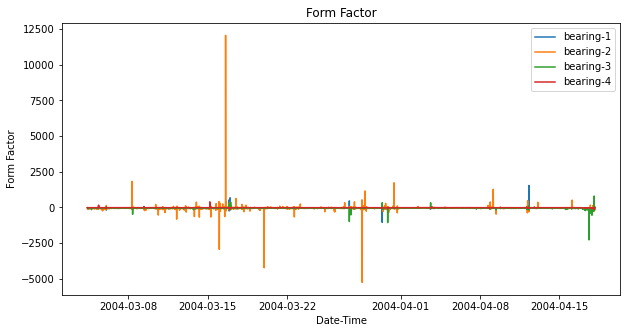

In [43]:
test_no=3

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Saving Outer Race Fault

In [45]:
df_ORF=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_ORF)):
    fault.append('Outer Race')

df_ORF.insert(9, 'Fault', fault)

df_ORF.to_csv('outer_race_fault_test_3.csv',index=False)  
df_ORF

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race



# Saving the Normal Bearing data

In [47]:
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing = pd.DataFrame()

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(bearing_no,test_no),index_col='Unnamed: 0')

        starting = np.floor(len(temp)*.21)
        ending = np.floor(len(temp)*.23)

        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]
        
        df_normal_bearing=df_normal_bearing.append(temp)

fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing.insert(9, 'Fault', fault)

df_normal_bearing.to_csv('Normal_Bearing.csv',index=False) 

<ipython-input-47-14a7686e521d>:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time = temp.index[starting]
<ipython-input-47-14a7686e521d>:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
